In [328]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.text import text_to_word_sequence
import numpy as np
from tqdm import tqdm
from collections import Counter
from pprint import pprint
import os
import soundfile as sf
import glob
import IPython.display as ipd
import webrtcvad

In [329]:
dir_data='D:\\Data\\ASR'

In [341]:
dir_data_0_00=os.path.join(dir_data,'asr_bengali_0','asr_bengali','data','00')

In [342]:
# Utility functions
def show_audio(frame,sample_rate,title=''):
    fig = plt.figure(figsize=(14, 4))
    ax1 = fig.add_subplot(111)
    ax1.set_title('Raw wave ' + title)
    ax1.set_ylabel('Amplitude')
    timestamps=(np.linspace(1,len(frame),len(frame))-1)*(1/sample_rate)
    ax1.plot(timestamps, frame)

In [343]:
# for path, dirs, files in os.walk(dir_data_0_00):
#     print(path)
#     print(dirs)
#     print(files)

In [344]:
# filepaths_00=glob.glob(os.path.join(dir_data_0_00,'*.flac'))
filepaths_00=[os.path.join(dir_data_0_00,file) for file in files]

In [345]:
samples, sample_rate = sf.read(filepaths_00[0])

In [346]:
dir_save='C:\\Users\\greas\\Projects\\asr2019\\audio-annotator\\static\\wav'
path_save=os.path.join(dir_save,(files[0]).split('.')[-2]+'.wav')
sf.write(path_save,samples,sample_rate)

In [303]:
ts=1/sample_rate

In [285]:
ipd.Audio(samples,rate=sample_rate)

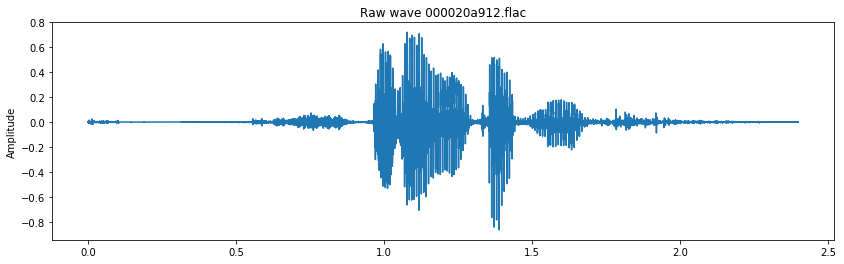

In [286]:
show_audio(samples,sample_rate,files[0])

In [287]:
vad = webrtcvad.Vad()

In [316]:
frame_duration=10e-3
nFrameSamples=int(frame_duration*sample_rate)
nFrameSamples

160

In [317]:
frames=[samples[i*nFrameSamples:(i+1)*nFrameSamples] for i in range(int(len(samples)//nFrameSamples))]
frames_byte=[np.int16(samples[i*nFrameSamples:(i+1)*nFrameSamples]*32768).tobytes() for i in range(int(len(samples)//nFrameSamples))]

In [318]:
len(frames)

240

In [319]:
len(frames[0])

160

In [320]:
webrtcvad.valid_rate_and_frame_length(sample_rate,len(frames[0]))

True

In [321]:
vad.set_mode(3)

In [322]:
labels=[]
for i,frame in enumerate(frames_byte):
    is_speech=vad.is_speech(buf=frame, sample_rate=sample_rate)
    labels.append(is_speech)
#     print('Frame {} contains speech: {}'.format(i+1,is_speech))

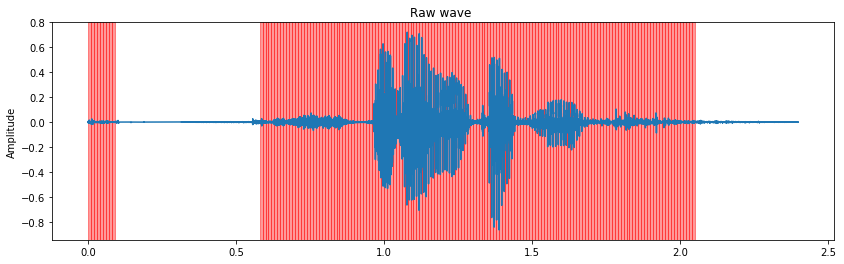

In [326]:
show_audio(samples,sample_rate,title='')
ymin=min(samples)
ymax=max(samples)
for i,label in enumerate(labels):
    if label==True:
        plt.axvspan(xmin=i*nFrameSamples*ts, xmax=(i+1)*nFrameSamples*ts,color='r',alpha=0.4)